In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [38]:
numerical_df = customer_df.select_dtypes(include =np.number)
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [3]:
categorical_df = customer_df.select_dtypes(include =object)
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [4]:
categorical_df.columns = categorical_df.columns.str.lower()
categorical_df.columns = categorical_df.columns.str.replace(' ', '_')
categorical_df = categorical_df.rename(columns={'employmentstatus': 'employment_status'})
categorical_df.head()


,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [5]:
categorical_df = categorical_df.drop(['customer'],axis =1) #dropping Name column

In [6]:
categorical_df['policy_type'] = categorical_df['policy_type'].str.replace('Auto', '')
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].str.replace('Car', '')

In [7]:
##Plot all the categorical variables with the proper plot. What can you see?

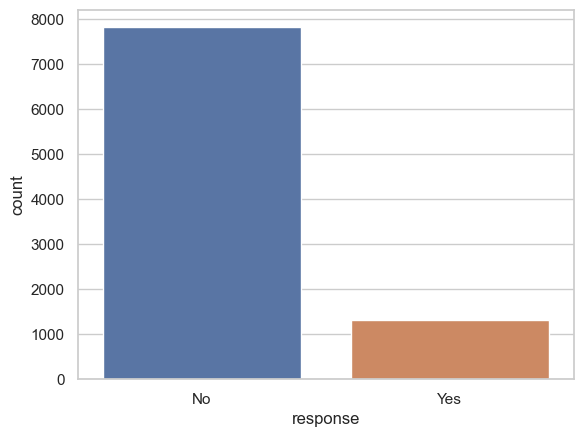

In [8]:
sns.set(style="whitegrid")
ax = sns.countplot(x='response', data=categorical_df)
plt.show() 

In [15]:
#creating response rate as a boolean series
categorical_df['response_rate'] = categorical_df['response'] == 'Yes'
categorical_df.head()


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door,Medsize,False
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door,Medsize,False
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door,Medsize,False
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize,False
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door,Medsize,False


In [16]:
#forcing the response rate boolean to be a numeric value


#mdata['response rate'] =  pd.to_numeric(mdata['response rate'], errors='coerce')
categorical_df["response_rate"] = categorical_df["response_rate"].astype(int)
categorical_df.head()


,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door,Medsize,0
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door,Medsize,0
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door,Medsize,0
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize,0
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door,Medsize,0


In [17]:
plt.style.use('default')

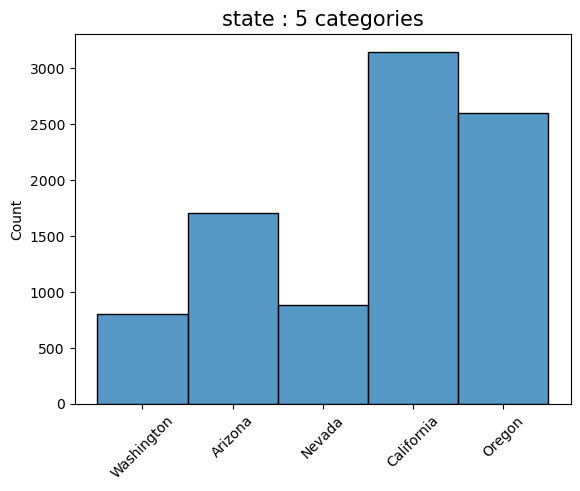

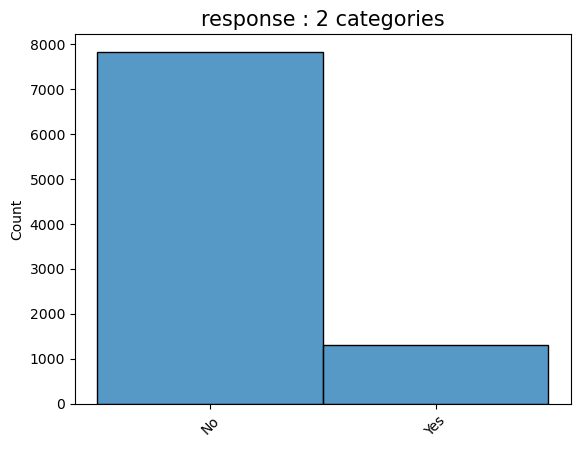

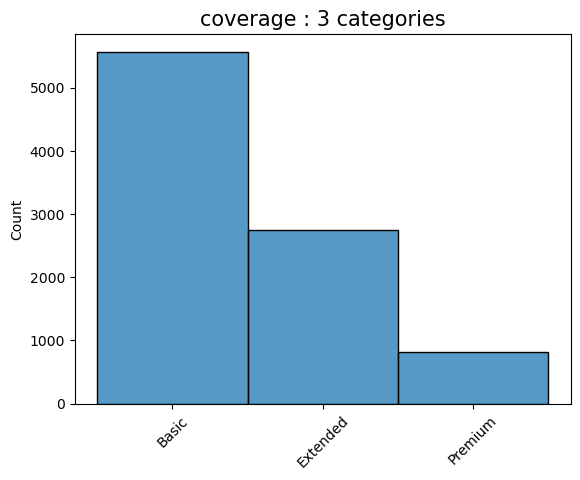

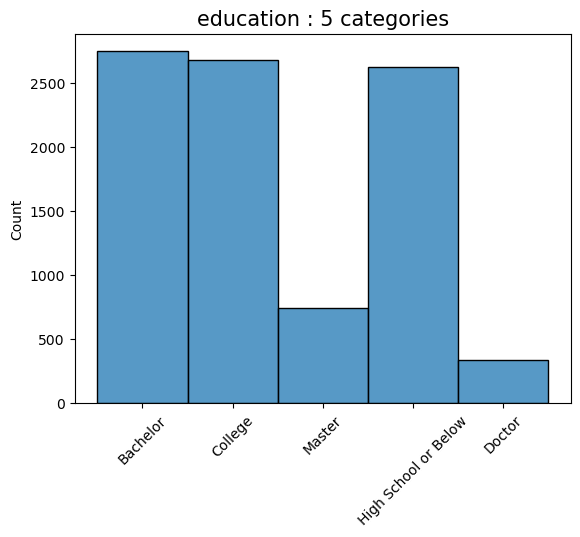

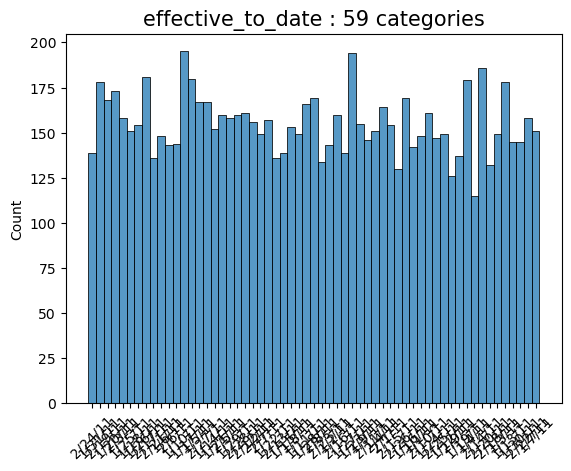

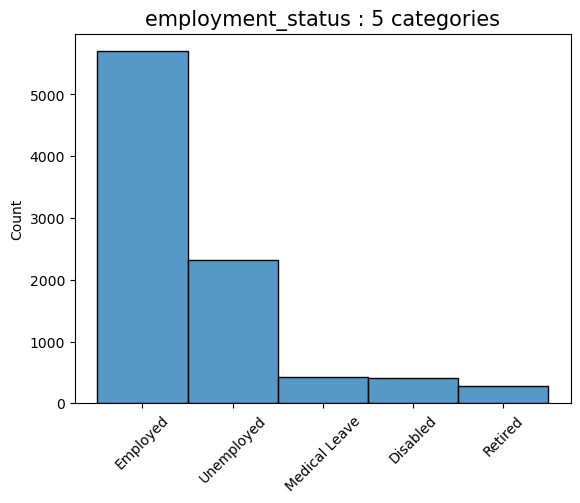

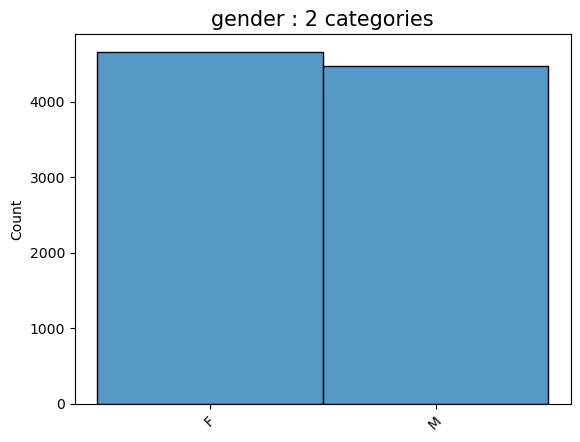

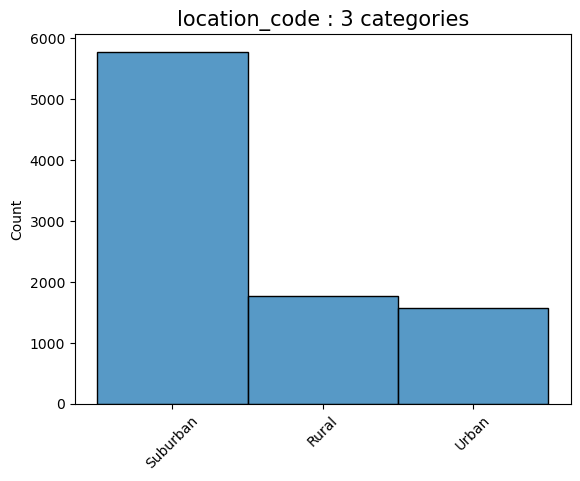

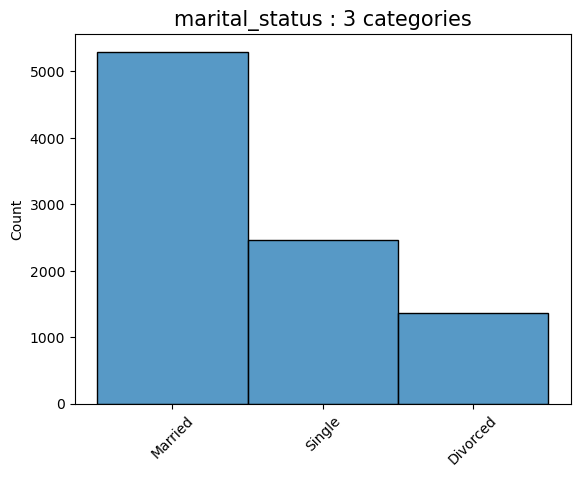

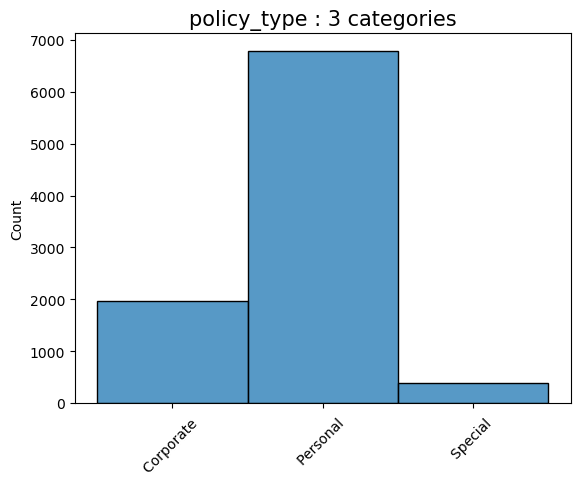

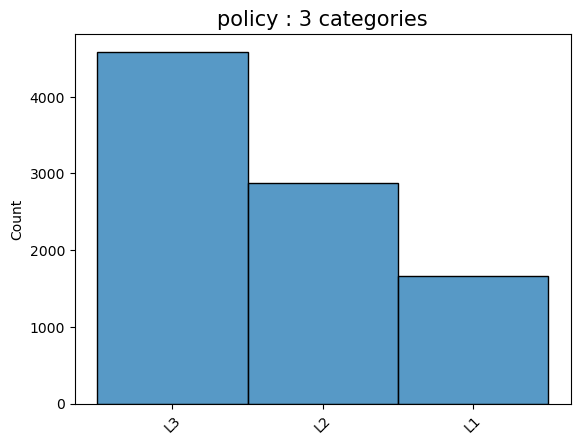

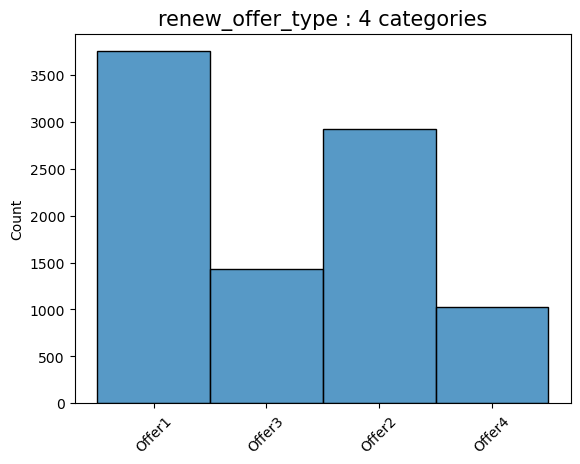

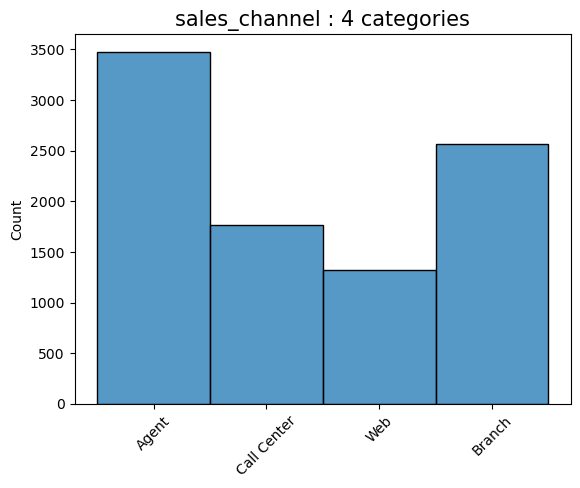

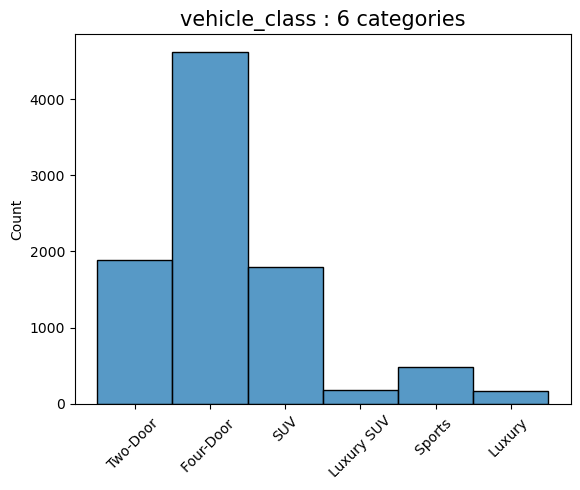

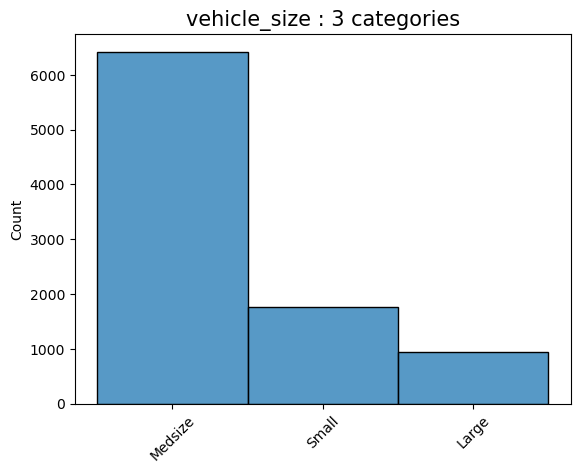

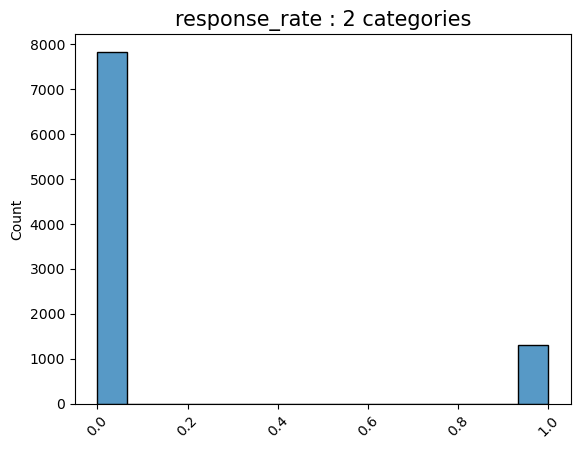

In [18]:
def plot_dist(df: pd.DataFrame):
    for column in df.columns:
        title = f"{column} : {len(df[column].unique())} categories" # this is the title display of the plot
        sns.histplot(df[column])
        plt.xticks(rotation= 45)
        plt.xlabel(None)
        plt.title(title , fontsize =15)
        plt.show()

plot_dist(categorical_df)  

In [19]:
categorical_df['vehicle_class'].unique()
categorical_df['vehicle_class'].value_counts()

Four-Door     4621
Two-Door      1886
SUV           1796
Sports         484
Luxury SUV     184
Luxury         163
Name: vehicle_class, dtype: int64

In [20]:
categorical_df['policy'] = categorical_df['policy'].str.replace('\w* ', '')


In [21]:
categorical_df['vehicle_class'] = np.where(categorical_df['vehicle_class'].isin(['Sports ','Luxury ']), 'Luxury Car', categorical_df['vehicle_class'])

In [22]:
print(categorical_df['employment_status'].unique())
categorical_df['employment_status'].value_counts()

['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']


Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employment_status, dtype: int64

In [23]:
print(categorical_df['education'].unique())
categorical_df['education'].value_counts()

['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']


Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [24]:
categorical_df['education'] = np.where(categorical_df['education'].isin(['College','Bachelor']), 'Undergraduate', categorical_df['education'])

In [25]:
categorical_df['employment_status'] = np.where(categorical_df['employment_status'].isin(['Medical Leave','Disabled','Retired']), 'Other', categorical_df['employment_status'])

In [26]:
categorical_df

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Undergraduate,2/24/11,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door,Medsize,0
1,Arizona,No,Extended,Undergraduate,1/31/11,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door,Medsize,0
2,Nevada,No,Premium,Undergraduate,2/19/11,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door,Medsize,0
3,California,No,Basic,Undergraduate,1/20/11,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize,0
4,Washington,No,Basic,Undergraduate,2/3/11,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door,Medsize,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Undergraduate,2/10/11,Employed,M,Urban,Married,Personal,L1,Offer2,Web,Four-Door,Medsize,0
9130,California,Yes,Extended,Undergraduate,2/12/11,Employed,F,Suburban,Divorced,Corporate,L3,Offer1,Branch,Four-Door,Medsize,1
9131,California,No,Extended,Undergraduate,2/6/11,Unemployed,M,Suburban,Single,Corporate,L2,Offer1,Branch,Four-Door,Medsize,0
9132,California,No,Extended,Undergraduate,2/3/11,Employed,M,Suburban,Married,Personal,L2,Offer3,Branch,Four-Door,Large,0


<AxesSubplot:xlabel='effective_to_date', ylabel='gender'>

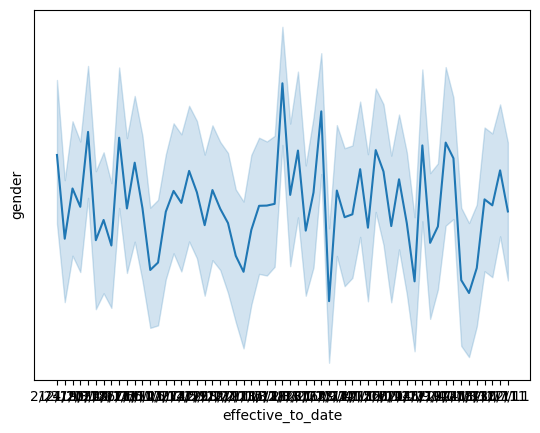

In [29]:
import seaborn as sns; sns.lineplot(data=categorical_df, x='effective_to_date', y= 'gender')

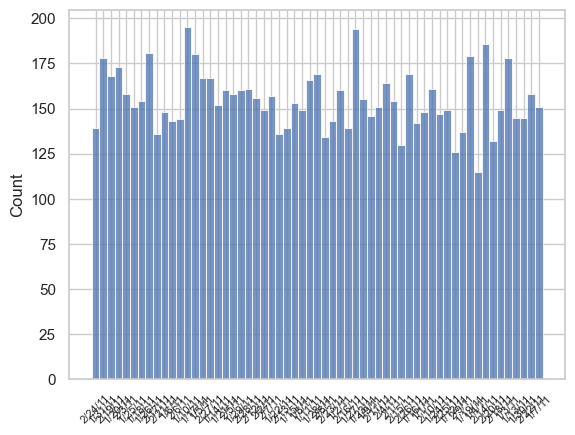

In [34]:
sns.histplot(categorical_df['effective_to_date'])
plt.xticks(rotation= 45,fontsize =8)
plt.xlabel(None)
plt.show()

In [35]:
customer_df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [41]:
import datetime

categorical_df['effective_to_date']= pd.to_datetime(categorical_df['effective_to_date'], errors='coerce')
display(categorical_df.head())

categorical_df['effective_to_date'][0]

,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,response_rate
0,Washington,No,Basic,Undergraduate,2011-02-24,Employed,F,Suburban,Married,Corporate,L3,Offer1,Agent,Two-Door,Medsize,0
1,Arizona,No,Extended,Undergraduate,2011-01-31,Unemployed,F,Suburban,Single,Personal,L3,Offer3,Agent,Four-Door,Medsize,0
2,Nevada,No,Premium,Undergraduate,2011-02-19,Employed,F,Suburban,Married,Personal,L3,Offer1,Agent,Two-Door,Medsize,0
3,California,No,Basic,Undergraduate,2011-01-20,Unemployed,M,Suburban,Married,Corporate,L2,Offer1,Call Center,SUV,Medsize,0
4,Washington,No,Basic,Undergraduate,2011-02-03,Employed,M,Rural,Single,Personal,L1,Offer1,Agent,Four-Door,Medsize,0


Timestamp('2011-02-24 00:00:00')

In [42]:
time_df = pd.DataFrame()
time_df['day']= categorical_df['effective_to_date'].dt.day
time_df['month']= categorical_df['effective_to_date'].dt.month
time_df['week']= categorical_df['effective_to_date'].dt.week
time_df['target']= customer_df['Total Claim Amount']


In [43]:
time_df

,day,month,week,target
0,24,2,8,384.811147
1,31,1,5,1131.464935
2,19,2,7,566.472247
3,20,1,3,529.881344
4,3,2,5,138.130879
...,...,...,...,...
9129,10,2,6,198.234764
9130,12,2,6,379.200000
9131,6,2,5,790.784983
9132,3,2,5,691.200000


In [44]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Load an example dataset with long-form data
# fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="day", y="target",
             hue="region", style="event",
             data=time_df)

ValueError: Could not interpret value `region` for parameter `hue`